In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import pickle as pkl
import seaborn as sns
import os
import statsmodels.api as sm
from scipy import stats

from lik_models import *
from helper_funcs import *
from plotting_funcs import *
from mcmc_data import *

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib
#matplotlib.use('Agg')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager
font_dirs = ['/project/elkabetz_lab_data/tools/PythonFonts/', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
matplotlib.rcParams['font.family'] = 'arial'

In [2]:
mcmc = mcmc_data(count_matrix_fn='data/pancreas_beta_development_e_14_5.raw_count_matrix.tsv',
                          pkl_dir='outputs_full/pancreas_beta_development_e_14_5/',
                          tfs_fn='data/mouse_transcription_factors_zhou_et_al.txt',
                          name='e14.5 Pancreas Beta Development')

#load in all pkls
mcmc.load_pkls(sub_tfs=False)

#get best fitting genes
mcmc.get_top_genes(n_top=50,sub_tf=False)

Loading Count Matrix...
Normalizing Count Matrix...
Loading pkls...


FileNotFoundError: [Errno 2] No such file or directory: 'outputs_full/pancreas_beta_development_e_14_5/'

In [3]:
len(mcmc.dic_dict)

12565

In [4]:
gene = 'Neurog3'

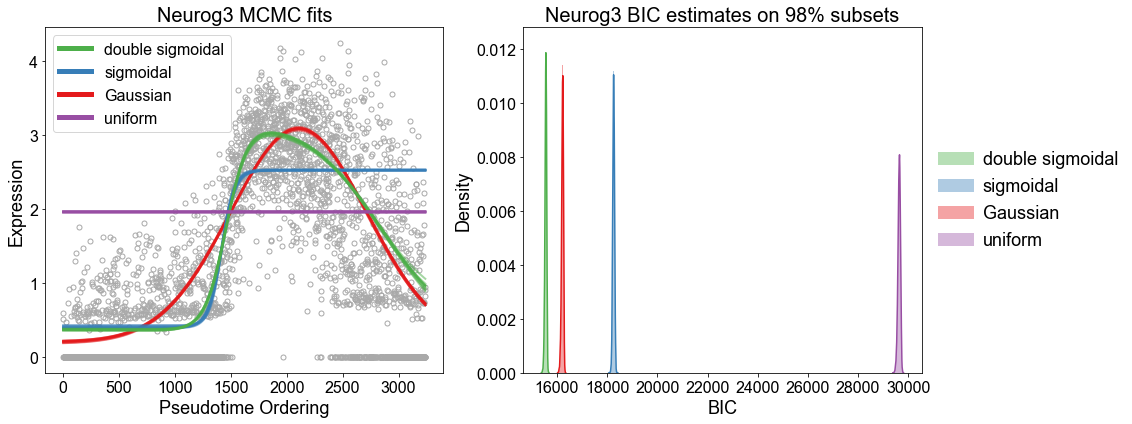

In [5]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,gene)

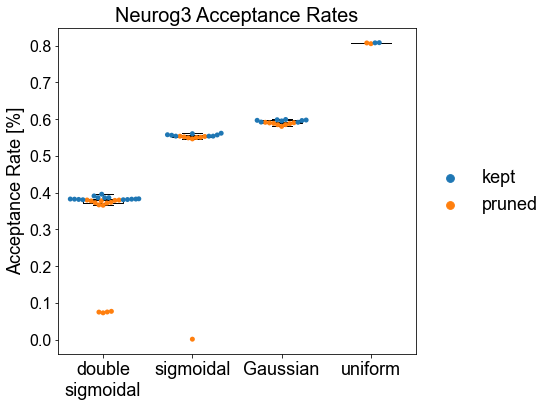

In [6]:
fig = make_acceptance_fraction_plot(mcmc,gene)

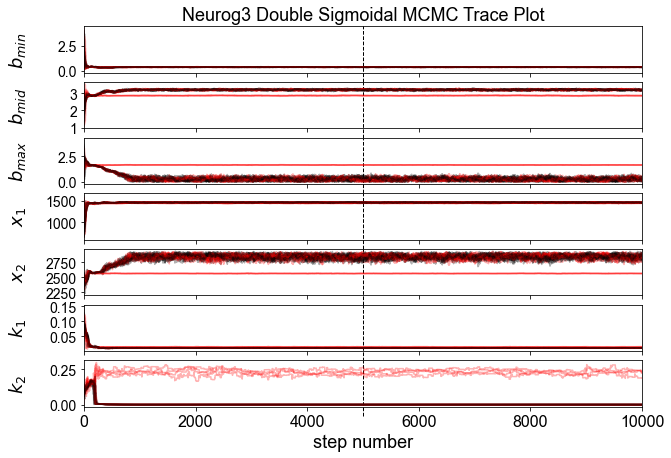

In [7]:
fig = make_mcmc_trace_plot(mcmc,gene,mcmc.best_fits[gene],sub_in_red=True)

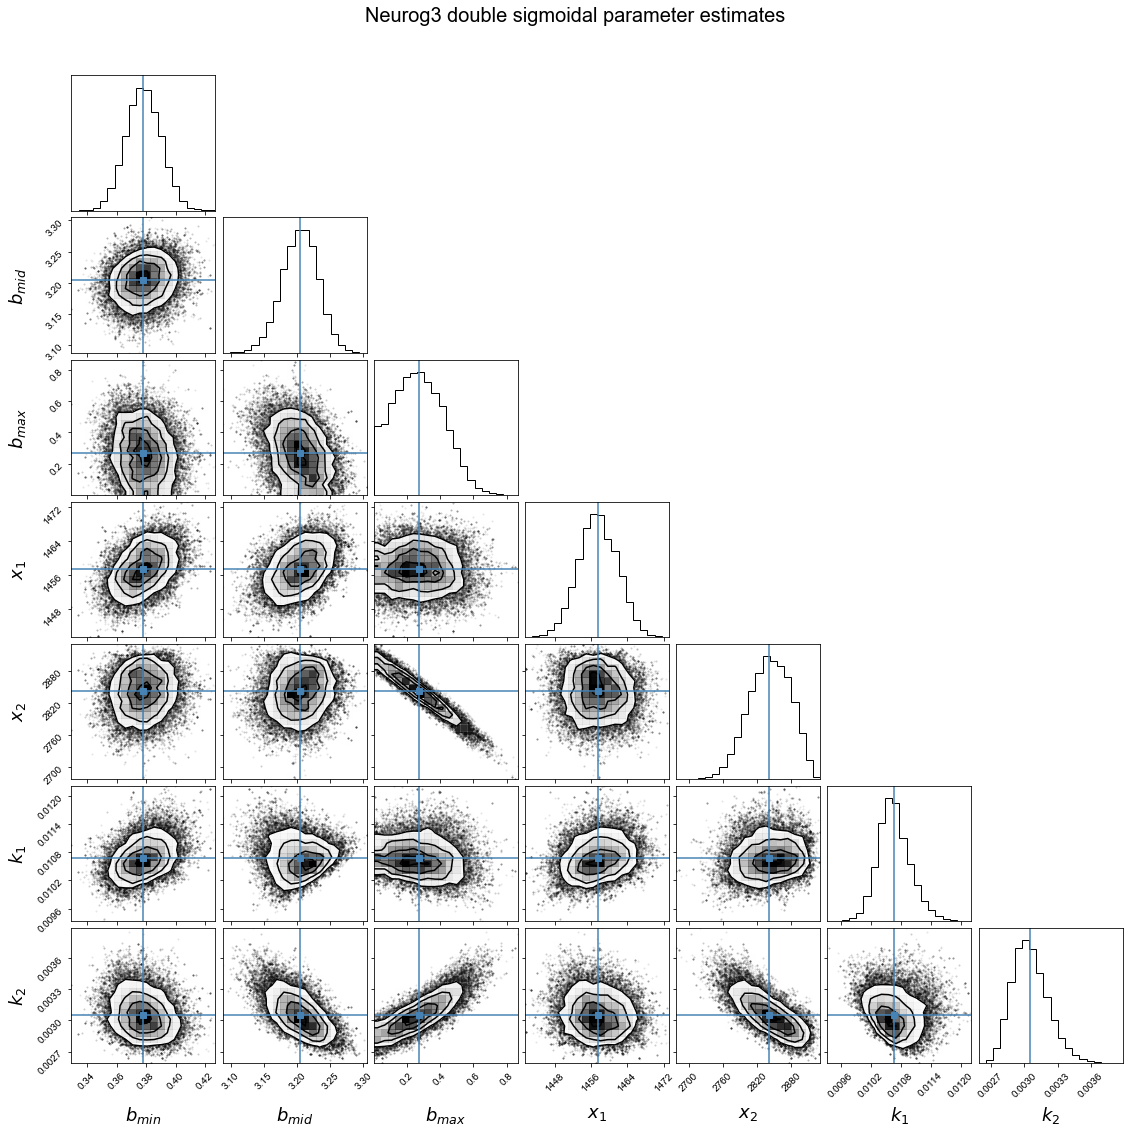

In [8]:
fig = make_corner_plot(mcmc,gene,mcmc.best_fits[gene],n_discard=5000,use_max_args=True)
plt.show()

In [9]:
human_tfs = [y[0]+y[1:].lower() for y in [x.strip("\n") for x in open('/project/elkabetz_lab/Daniel/Transcriptional_Cascades/data/transcription_factors_lambert_et_al.txt','r').readlines()]]
mcmc.tfs = human_tfs

In [10]:
len([x for x in mcmc.best_fits.items() if x[1] != 'uniform']),len(mcmc.best_fits)

(3172, 12565)

In [11]:
len([x for x in mcmc.best_fits.items() if x[1] != 'uniform' and x[0] in mcmc.tfs]),len([x for x in mcmc.best_fits if x in mcmc.tfs])

(169, 636)

In [12]:
#get best fitting genes
mcmc.get_top_genes(n_top=1000,sub_tf=True)

In [13]:
len(mcmc.genes_good_fit)

169

sig down
Ybx1
Fosl2
Thyn1
Nfe2
Rarg
Rxrg
Atf3
Mycn
Ahr
Onecut1
Creb3l2
Cebpa
Nr4a1
Nfia
Sox9
Elf4
Nr5a2
Ehf
Grhl2
Etv6
Rest
Klf3
Nfib
Rara
Tcf7l2
Zfhx3
Scx
Hes1
Elf5
Sox5
Sox6
Tgif1
Tcf7l1
Prmt3
Smad3
Tfdp2
Tead1
Irf9
Plscr1
Tgif2
Bcl11b
sig up
Rorc
Hbp1
Foxa2
Mafb
Mxd1
Glyr1
Zbtb7a
Casz1
Mlx
Zfp91
Safb
Lmx1b
Meis3
Rfx6
Scmh1
Smad1
Nkx6-1
Klf10
Myt1
Gatad2b
Zeb1
Baz2a
Irf8
Kcnip3
Jund
Dach1
Atf4
Gpbp1
Clock
Gtf2b
Zfp92
Neurod1
Mafg
Nfatc2
Arx
Ebf1
Usf2
Stat3
Pou3f4
Zfhx2
Etv1
Yy1
Hmgn3
Klf7
Bcl6b
Creb3
Maff
Mlxipl
Kmt2a
St18
Msx1
Rfx3
Pax6
Irf2
Cxxc5
Fev
Foxo1
Phf1
Rfx2
Baz2b
Etv5
Vdr
Sim1
Cxxc4
Mnx1
Zbtb7c
Cdx2
Klf2
Shox2
Isl1
Irx2
Pin1
transient up
Hhex
Atoh8
Snai2
Sox4
Foxa3
Neurog3
Nfix
Tcf3
Tcf15
Tead2
Insm1
Klf13
Nkx2-2
Hes6
Zbtb18
Sox11
Tfap2c
Son
Prox1
E2f1
Tcf20
Cbx2
Pax4
Pou3f1
Zfpm1
Tbpl1
Rbpj
Snai1
Setbp1
Mycl
Bhlhe22
Neurod2
Kdm5b
Drap1
Mxi1
Nhlh1
Lhx1
transient down
Klf6
Gata6
Hnf1b
Jun
Junb
Pdx1
Fos
Hmga2
Nr3c1
Meis2
Arid5b
Tshz2
Thra
Elf1
Tsc22d1
Zbtb20
Mbnl2
Foxp1
Peg3

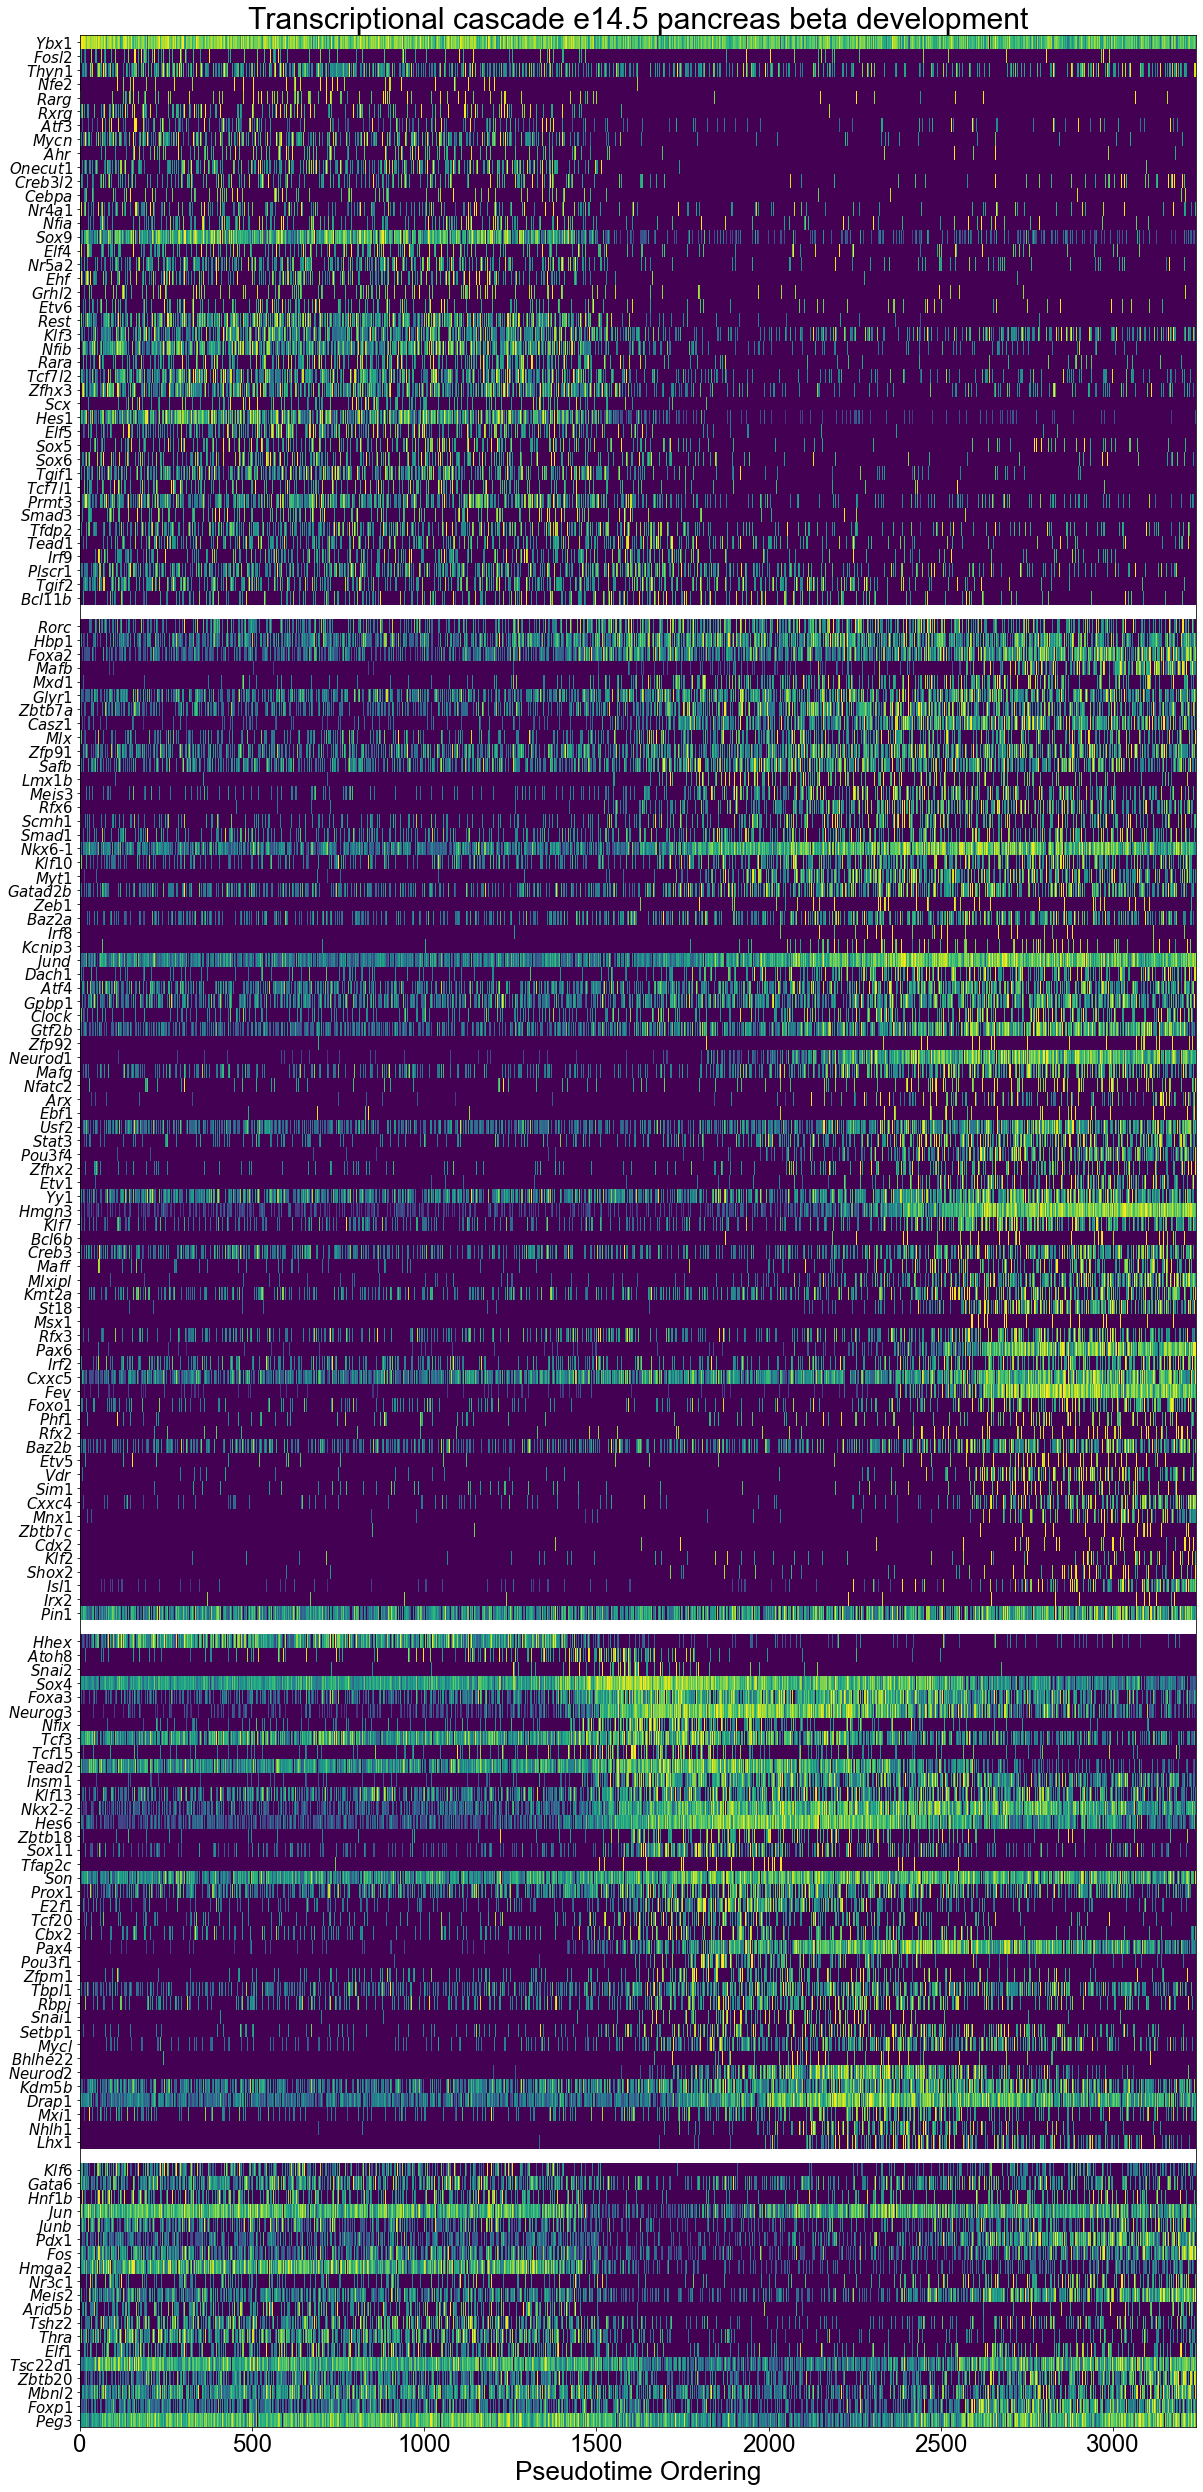

In [33]:
fig = plot_transcriptional_cascade_heatmap_full(mcmc,title=None, tfs=mcmc.genes_good_fit, figsize=(20,44),
                                                cmap=cm.viridis,ytick_fontsize=15,yticks_italics=True)
ax = plt.gca()
plt.xlim(0,len(mcmc.expr_dict['Neurog3']))
plt.xticks(fontsize=24)
plt.xlabel('Pseudotime Ordering',fontsize=26)
plt.title('Transcriptional cascade e14.5 pancreas beta development',fontsize=30)
plt.savefig('figures_paper_mouse_data/supp_figures/pancreas_heatmap.pdf',bbox_inches='tight')

sig down
Ybx1
Fosl2
Thyn1
Nfe2
Rarg
Rxrg
Atf3
Mycn
Ahr
Onecut1
Creb3l2
Cebpa
Nr4a1
Nfia
Sox9
Elf4
Nr5a2
Ehf
Grhl2
Etv6
Rest
Klf3
Nfib
Rara
Tcf7l2
Zfhx3
Scx
Hes1
Elf5
Sox5
Sox6
Tgif1
Tcf7l1
Prmt3
Smad3
Tfdp2
Tead1
Irf9
Plscr1
Tgif2
Bcl11b
sig up
Rorc
Hbp1
Foxa2
Mafb
Mxd1
Glyr1
Zbtb7a
Casz1
Mlx
Zfp91
Safb
Lmx1b
Meis3
Rfx6
Scmh1
Smad1
Nkx6-1
Klf10
Myt1
Gatad2b
Zeb1
Baz2a
Irf8
Kcnip3
Jund
Dach1
Atf4
Gpbp1
Clock
Gtf2b
Zfp92
Neurod1
Mafg
Nfatc2
Arx
Ebf1
Usf2
Stat3
Pou3f4
Zfhx2
Etv1
Yy1
Hmgn3
Klf7
Bcl6b
Creb3
Maff
Mlxipl
Kmt2a
St18
Msx1
Rfx3
Pax6
Irf2
Cxxc5
Fev
Foxo1
Phf1
Rfx2
Baz2b
Etv5
Vdr
Sim1
Cxxc4
Mnx1
Zbtb7c
Cdx2
Klf2
Shox2
Isl1
Irx2
Pin1
transient up
Hhex
Atoh8
Snai2
Sox4
Foxa3
Neurog3
Nfix
Tcf3
Tcf15
Tead2
Insm1
Klf13
Nkx2-2
Hes6
Zbtb18
Sox11
Tfap2c
Son
Prox1
E2f1
Tcf20
Cbx2
Pax4
Pou3f1
Zfpm1
Tbpl1
Rbpj
Snai1
Setbp1
Mycl
Bhlhe22
Neurod2
Kdm5b
Drap1
Mxi1
Nhlh1
Lhx1
transient down
Klf6
Gata6
Hnf1b
Jun
Junb
Pdx1
Fos
Hmga2
Nr3c1
Meis2
Arid5b
Tshz2
Thra
Elf1
Tsc22d1
Zbtb20
Mbnl2
Foxp1
Peg3

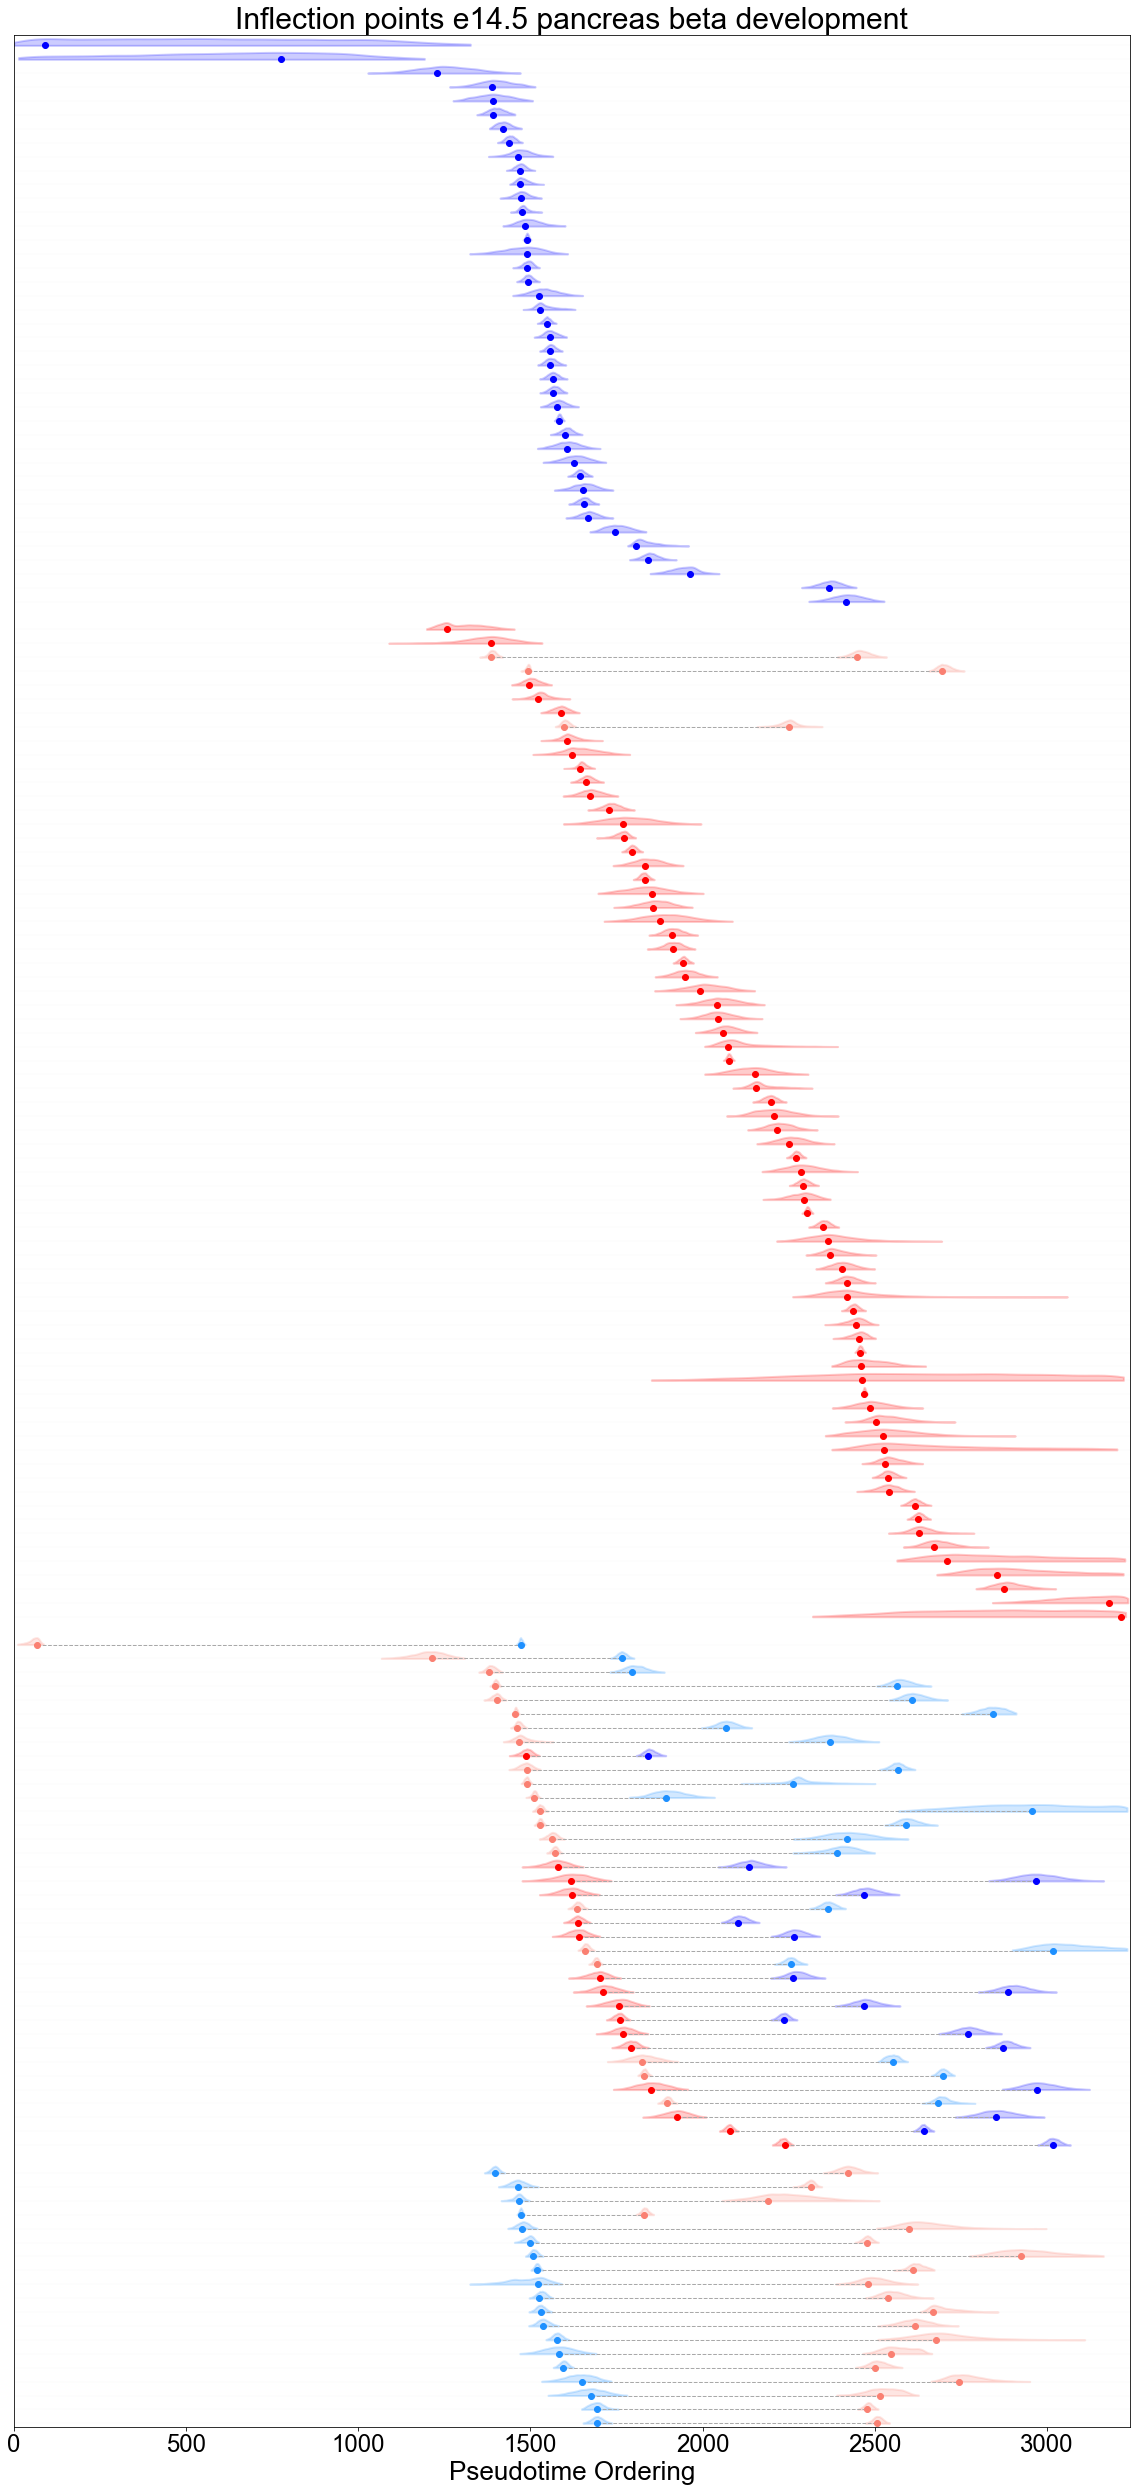

In [34]:
fig = plot_transcriptional_cascade_violins_full(mcmc,title=None, tfs=mcmc.genes_good_fit, figsize=(20,44))
ax = plt.gca()
plt.xlim(0,len(mcmc.expr_dict['Neurog3']))
plt.xticks(fontsize=24)
plt.xlabel('Pseudotime Ordering',fontsize=26)
plt.title('Inflection points e14.5 pancreas beta development',fontsize=30)
plt.savefig('figures_paper_mouse_data/supp_figures/pancreas_violin_plot.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'Transcriptional cascade e14.5 pancreas beta development')

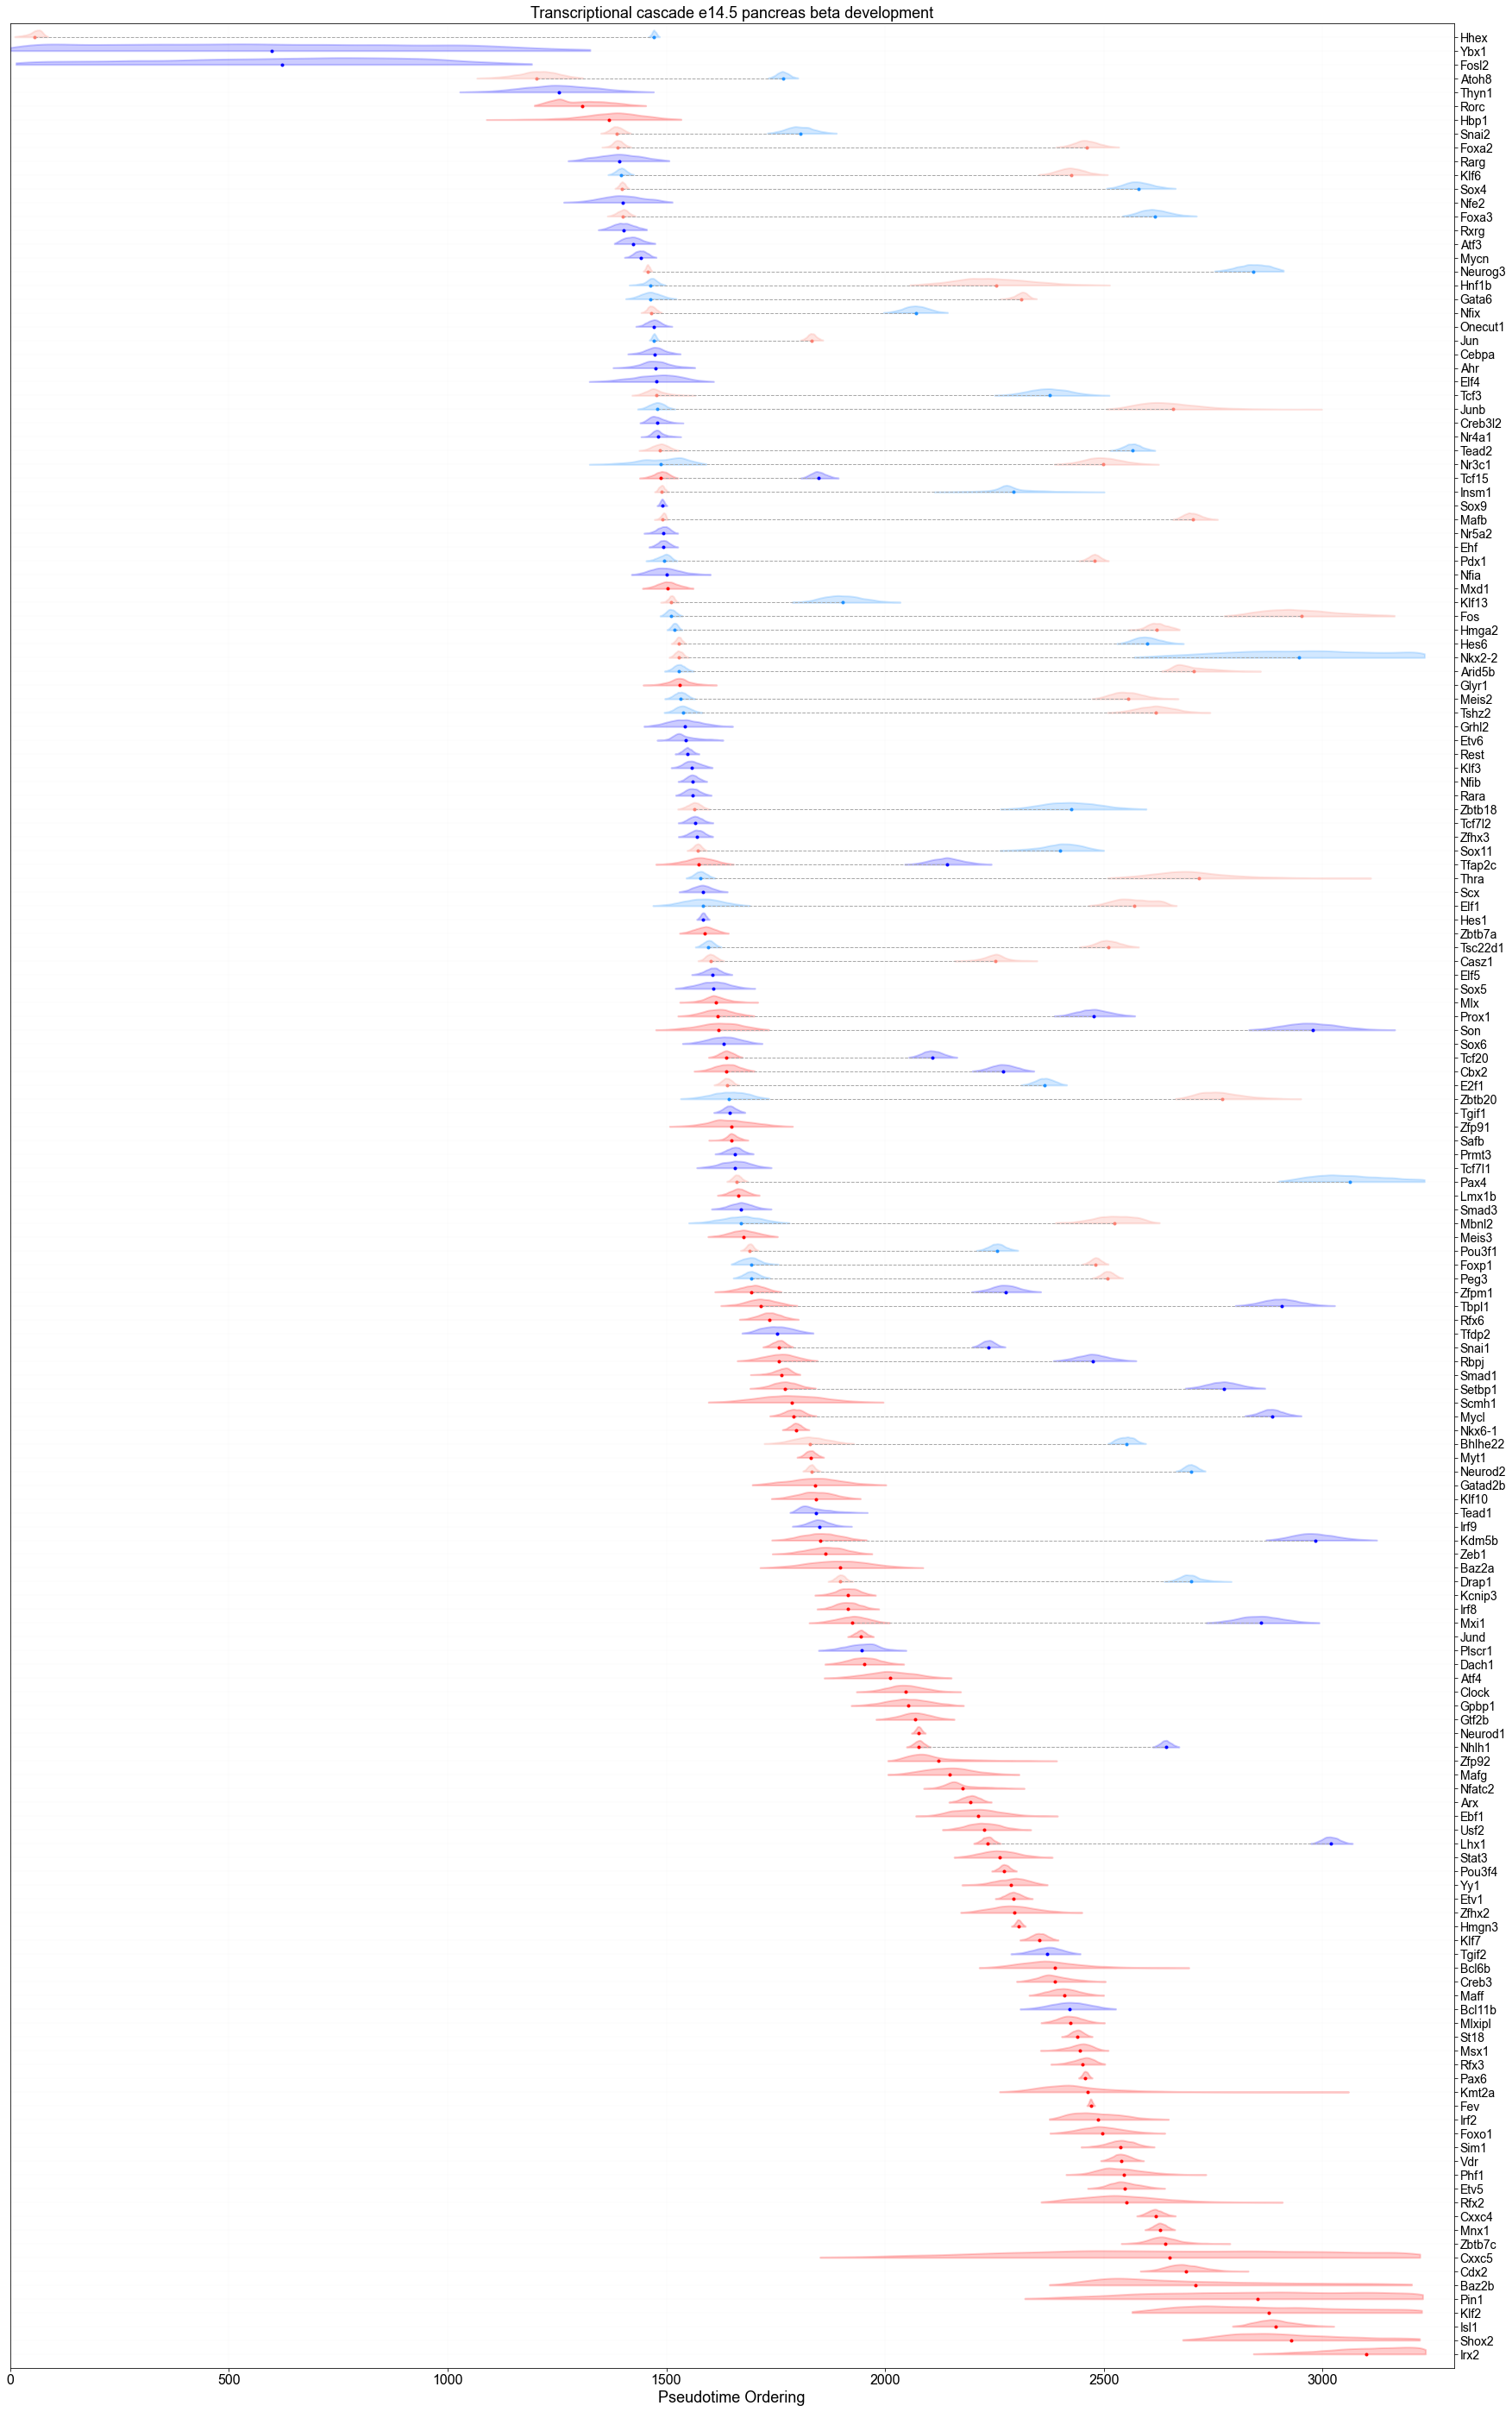

In [16]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(30,50), tfs=mcmc.genes_good_fit,xlim=(0,3300))
ax = plt.gca()
plt.ylim(-len(mcmc.genes_good_fit),1)
plt.title('Transcriptional cascade e14.5 pancreas beta development',fontsize=18)

In [17]:
autocorrelations = {}
iter_ = 0
for j,pkl_fn in enumerate(os.listdir(mcmc.pkl_dir)):
    if 'autocorrelation' not in pkl_fn: continue
    iter_ += 1
    gene = pkl_fn.split(".auto")[0]
    if iter_%100 == 0: print(iter_, gene)
    autocorrelations[gene] = pkl.load(open(mcmc.pkl_dir+pkl_fn,'rb'))

100 Armcx2
200 Drg1
300 Ccdc33
400 Itgb8
500 Sema6b
600 Pagr1a
700 Dimt1
800 Stambpl1
900 Kcne1l
1000 Pigw
1100 Prelid1
1200 C130021I20Rik
1300 Lbr
1400 Mab21l3
1500 Zfp777
1600 Arih1
1700 Tef
1800 Ehbp1
1900 Znhit3
2000 Crocc
2100 Cd22
2200 Vgll4
2300 Unc5b
2400 Arrdc2
2500 Atad3a
2600 Dpp8
2700 Arrb2
2800 Ddah2
2900 Foxm1
3000 Hfe
3100 Slc15a4
3200 Arl14ep
3300 Csnk1e
3400 Dcun1d2
3500 Fam234a
3600 Acot8
3700 Metap1
3800 Gm43949
3900 Sirpa
4000 Hs3st1
4100 Wdr89
4200 2700046G09Rik
4300 Gstt2
4400 Zfp944
4500 Efemp1
4600 H2-K1
4700 Tgfbr2
4800 Ano10
4900 Rab28
5000 Snx8
5100 Sepw1
5200 Clstn1
5300 Arl5b
5400 Pald1
5500 Hpcal1
5600 Cd68
5700 Gm20324
5800 Fbxo21
5900 Prr29
6000 Lrrc51
6100 Gas6
6200 Atg12
6300 Map7d1
6400 Zbtb20
6500 Iqck
6600 Fstl1
6700 Tmem100
6800 Sord
6900 Ipo7
7000 Etv5
7100 Cmtm4
7200 Gnpda1
7300 Trib1
7400 Mpp3
7500 Plcb4
7600 Wdr41
7700 BC043934
7800 Smarcad1
7900 Tmem173
8000 Lrfn3
8100 Gabarapl2
8200 Stk38
8300 Cfap52
8400 Cat
8500 Hps5
8600 Tmem2
8700 Mrpl52


In [18]:
len(autocorrelations)

12565

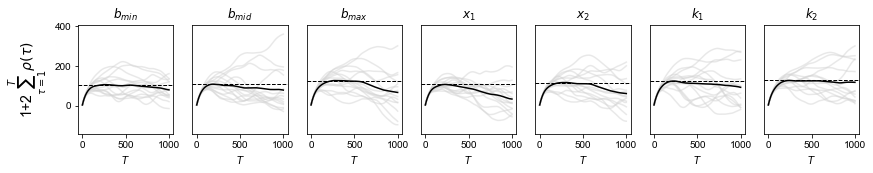

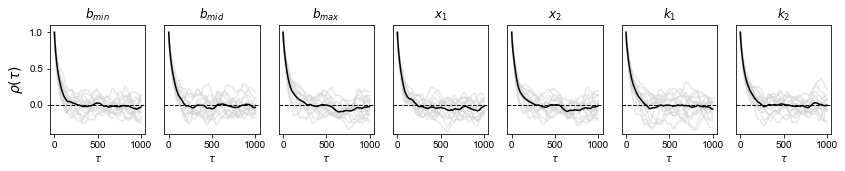

In [19]:
fig = plot_autocorr_time_esimates(mcmc,'Neurog3',autocorrelations)
plt.show()
fig = plot_autocorrelation_func(mcmc,'Neurog3',autocorrelations)
plt.show()

Text(0.5, 1.0, 'Autocorrelation time')

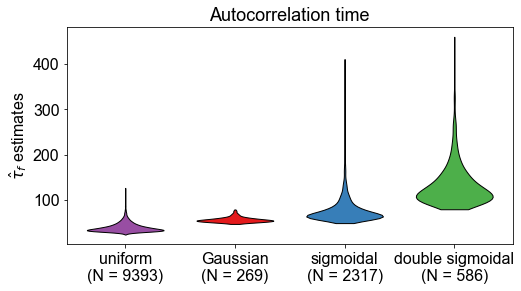

In [20]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
clrs = sns.color_palette('Set1', n_colors=10)  # a list of RGB tuples
color_dict = {'gauss':clrs[0],'sigmoidal':clrs[1],'double sigmoidal':clrs[2],'uniform':clrs[3]}
    
colors = sns.color_palette('tab10', n_colors=10)  # a list of RGB tuples
full_vals = []
pos = [0,1,2,3]
types_arg_ = []
types_autocorrtimes = {'uniform':[],'gauss':[],'sigmoidal':[],'double sigmoidal':[]}
types_ = ['uniform','gauss','sigmoidal','double sigmoidal']

for gene in mcmc.best_fits:
    type_ = mcmc.best_fits[gene]
    types_autocorrtimes[type_].append(np.mean(autocorrelations[gene]['autocorr_time_estimates']))

for type_ in types_autocorrtimes:
    full_vals.append(types_autocorrtimes[type_])
    types_arg_.extend([type_]*len(types_autocorrtimes[type_]))

parts = ax.violinplot(full_vals, positions=pos, showmeans=False, showmedians=False,showextrema=False, widths=0.7, bw_method='silverman')
for j,bod in enumerate(parts['bodies']):
    bod.set_color(color_dict[types_[j]])
    bod.set_alpha(1)
    bod.set_edgecolor('black')

#for j,val in enumerate(full_vals):
#    plt.plot([pos[j]]*len(val)+(np.random.rand(len(val))-0.5)/5,val,'o',color='k',markersize=1)
    
plt.xticks(range(len(pos)),[x+'\n(N = '+str(len(types_autocorrtimes[x]))+')' if x != 'gauss' else 
                           'Gaussian\n(N = '+str(len(types_autocorrtimes[x]))+')' for x in types_],fontsize=16)
plt.ylabel(r'$\hat{\tau}_f$ estimates',fontsize=16)
plt.yticks(fontsize=16)
plt.title('Autocorrelation time',fontsize=18)

Inflec 1 overlap:  p=0.097
70000
Inflec 2 overlap:  p<1.43e-05


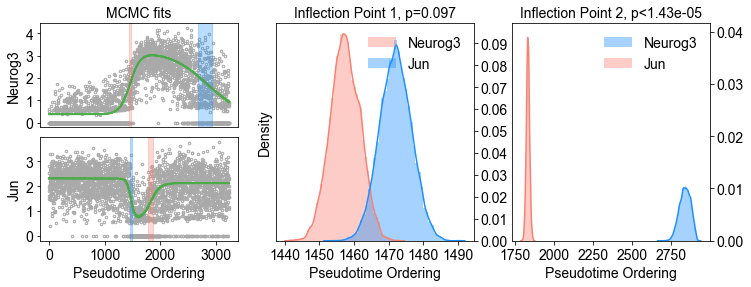

In [21]:
gene1 = 'Neurog3'
gene2 = 'Jun'
n_discard=5000

fig = make_inflec_point_comp_plot(mcmc,gene1,gene2)

Neurog3
Pdx1
Nkx2-2
Pax4
Nkx6-1
Neurod1
Pax6
Mnx1
Isl1


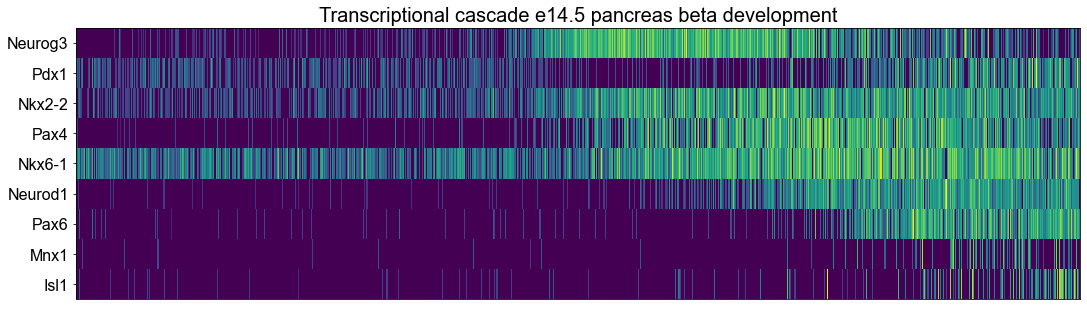

In [22]:
fig = plot_transcriptional_cascade_heatmap(mcmc,title=None, tfs=['Pdx1','Neurog3','Neurod1','Nkx2-2','Pax4','Nkx6-1',
                                        'Isl1','Pax6','Mnx1'], figsize=(18,5),cmap=cm.viridis)
ax = plt.gca()
plt.xlim(0,len(mcmc.expr_dict['Neurog3']))
plt.xlabel('')
plt.xticks([])
ax.yaxis.tick_left()
plt.yticks(fontsize=16)
plt.title('Transcriptional cascade e14.5 pancreas beta development',fontsize=20)
plt.savefig('figures_paper_mouse_data/fig5/pancreas_heatmap.pdf',bbox_inches='tight')

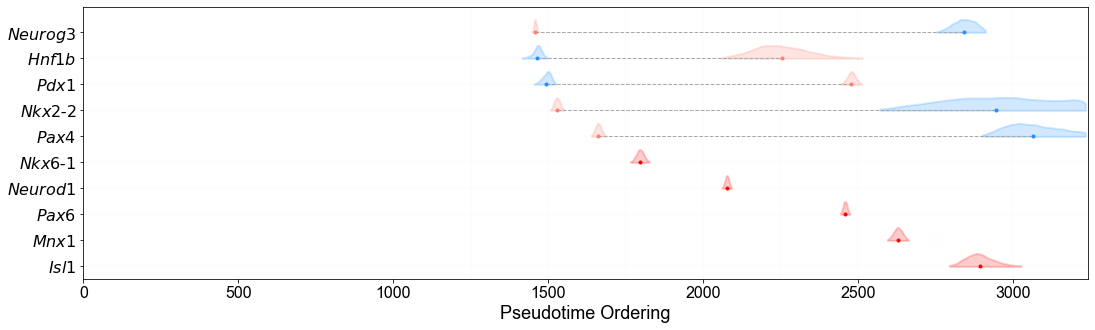

In [23]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,5),
                                   tfs=['Pdx1','Neurog3','Neurod1','Nkx2-2','Pax4','Nkx6-1',
                                        'Isl1','Pax6','Mnx1','Hnf1b'],yticks_italics=True)
ax = plt.gca()
ax.yaxis.tick_left()
plt.xlim(0,len(mcmc.expr_dict['Neurog3']))
plt.title('')
plt.yticks(fontsize=16)
plt.savefig('figures_paper_mouse_data/fig5/pancreas_violin.pdf',bbox_inches='tight')

In [24]:
adata_sub_beta = pkl.load(open('data/pancreas_beta_development_e_14_5_traj_adata.pkl','rb'))

In [25]:
set(adata_sub_beta.obs['clusters_fig6_broad_final'])

{'Ductal', 'Fev+', 'Ngn3 high EP', 'Ngn3 low EP'}

In [26]:
color_dict = {}
for j,cell_type in enumerate(['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Fev+']):
    color_dict[cell_type] = adata_sub_beta.uns['clusters_fig6_broad_final_colors'][j]
color_dict['Fev+ Beta'] = color_dict['Fev+']

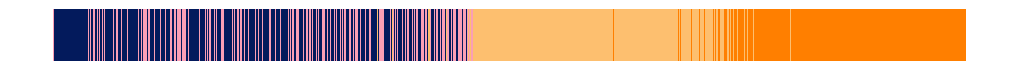

In [27]:
fig = plt.figure(figsize=(18,1))

for ii,cell_type in enumerate(adata_sub_beta.obs.sort_values(by='dpt_pseudotime')['clusters_fig6_broad_final']):
    plt.bar(ii,1,color=color_dict[cell_type],width=1)

plt.axis('off')
plt.savefig('figures_paper_mouse_data/fig5/pancreas_heatmap_cell_types.pdf',bbox_inches='tight')

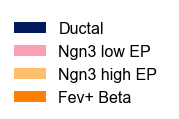

In [28]:
fig = plt.figure(figsize=(1,1))

for cell_type in ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Fev+ Beta']:
    plt.bar(ii,0,color=color_dict[cell_type],width=0,label=cell_type)

plt.axis('off')
plt.legend(frameon=False,fontsize=16)
plt.savefig('figures_paper_mouse_data/fig5/pancreas_cell_types_legend.pdf',bbox_inches='tight')

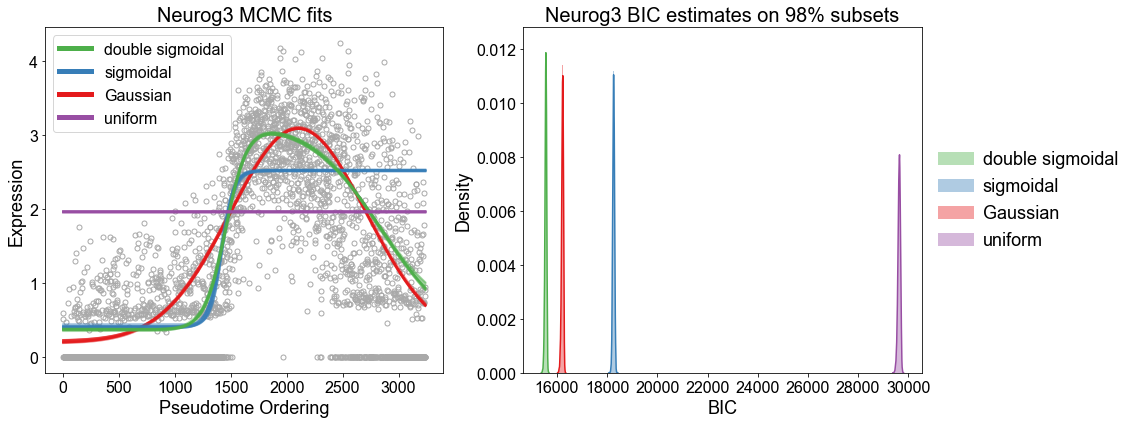

In [29]:
fig = make_joint_fit_and_bic_estimate_plot(mcmc,'Neurog3')

In [31]:
genes_to_check = ['Abcc8','Amer3','Baiap3','Btbd17','C1ql1','Cd99l2','Cdh18','Cdh22','Celf3','Celf4',
                 'Cerkl','Chga','Chrna4','Coro2b','Cpe','Cryba2','Ddc','Fam92b','Ftcd','Gabbr2',
                 'Gad2','Gck','Gnao1','Gpr142','Hepacam2','Hist1h2bj','Insm1','Kcna3','Kcnb2','Kcnd3',
                 'Kcnj11','Kcnk16','Kif19','Ldlrap1','Lmx1b','Mgat4a','Mlxipl','Neurod1','Neurog3','Nkx2-2',
                 'Nol4','Nptx2','Opcml','Oprk1','Pax4','Pcsk1','Pde2a','Plxna2','Prph2','Psca',
                 'Rgs16','Rgs9','Scg2','Sec11c','Sez6l','Sgcd','Slc18a2','Slc30a8','Sptbn4','Sstr1',
                 'Sstr2','St18','Stxbp1','Susd2','Synpr','Tacr1','Thsd4','Tnr','Ube2ql1']

#genes_to_check = ['Lmx1b','Foxa1','Foxa2','Foxp1','Gata4','Insm1','Klf3','Klf13','Nkx2-2','Rfx3','Sox4',
#                 'Sox11','Pax4','Pbx1','Neurog3']
var_genes = []
for gene in genes_to_check:
    if gene in mcmc.best_fits:
        print(gene,mcmc.best_fits[gene])
        if mcmc.best_fits[gene] != 'uniform':
            var_genes.append(gene)

Abcc8 sigmoidal
Baiap3 sigmoidal
Btbd17 double sigmoidal
C1ql1 uniform
Cd99l2 uniform
Celf3 sigmoidal
Celf4 double sigmoidal
Cerkl sigmoidal
Chga sigmoidal
Chrna4 uniform
Coro2b gauss
Cpe sigmoidal
Cryba2 double sigmoidal
Ddc sigmoidal
Fam92b sigmoidal
Gabbr2 gauss
Gck sigmoidal
Gnao1 sigmoidal
Gpr142 uniform
Hepacam2 sigmoidal
Hist1h2bj uniform
Insm1 double sigmoidal
Kcnb2 sigmoidal
Kcnk16 uniform
Ldlrap1 uniform
Lmx1b sigmoidal
Mgat4a uniform
Mlxipl sigmoidal
Neurod1 sigmoidal
Neurog3 double sigmoidal
Nkx2-2 double sigmoidal
Nol4 sigmoidal
Nptx2 double sigmoidal
Pax4 double sigmoidal
Pcsk1 sigmoidal
Pde2a gauss
Plxna2 uniform
Rgs16 double sigmoidal
Rgs9 uniform
Scg2 sigmoidal
Sec11c uniform
Sez6l sigmoidal
Slc18a2 gauss
Sstr2 uniform
St18 sigmoidal
Stxbp1 double sigmoidal
Susd2 gauss
Synpr sigmoidal
Thsd4 uniform


Text(0.5, 1.0, 'Transcriptional cascade e14.5 pancreas beta development Neurog3 targets')

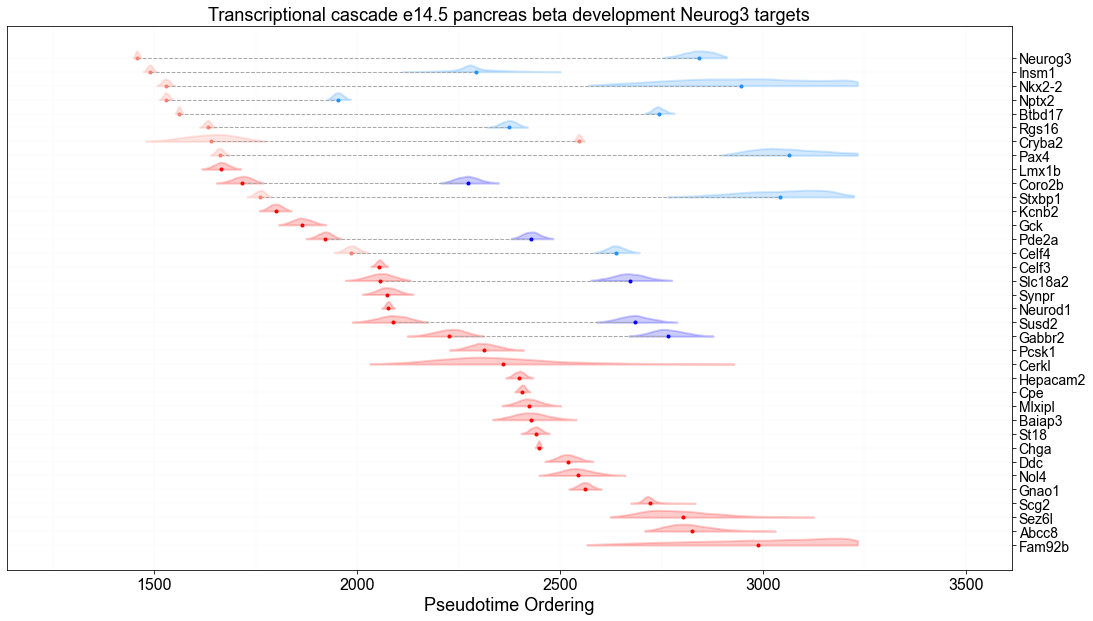

In [32]:
fig = plot_transcriptional_cascade(mcmc,title=None, figsize=(18,10), tfs=var_genes)
ax = plt.gca()
plt.title('Transcriptional cascade e14.5 pancreas beta development Neurog3 targets',fontsize=18)